## 1. EDA - Rekrutacja na studia ("Placement_Data_Full_Class.csv")

Wykonaj analizę danych i odpowiedz na poniższe pytania:  
1. Który czynnik decyduje o przyjęciu kandydata na studia?  
2. Czy procenty uzyskane w testach (zmienne *_p) wpływają w jakimś stopniu na to, czy kandydat zostanie przyjęty?
3. Jaka specjalizacja jest najbardziej pożądana przez firmy?
4. Przeprowadź wszelkiego rodzaju analizy i testy statystyczne - wedle uznania

## 1.1 Konfiguracja danych i wstępny przegląd danych

In [1]:
# Importowanie paczek do EDA

import pandas as pd # Analiza danych
import numpy as np # Potrzebny do pandasa

In [2]:
# Importowanie paczek do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import paczek ML

# + ew. Konfiguracja ustawień globalnych np. Ścieżki do danych , random_state'a itp.

In [4]:
# Załadowanie zbioru danych
df = pd.read_csv('../Dane/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.tail() 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.shape

(215, 15)

In [8]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
df.status.value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [12]:
# Między cechami status oraz salary występuje współliniowość 
no_salary = df.salary.isna() == True
df[no_salary][['status', 'salary']]

,status,salary
3,Not Placed,NaN
5,Not Placed,NaN
6,Not Placed,NaN
9,Not Placed,NaN
12,Not Placed,NaN
...,...,...
198,Not Placed,NaN
201,Not Placed,NaN
206,Not Placed,NaN
208,Not Placed,NaN


## 1.2 Eksploracyjna Analiza Danych (EDA)

In [13]:
df.drop('sl_no', inplace=True, axis=1)

In [14]:
nan_values_count = df.salary.isna().sum()
nan_values_series = pd.Series(nan_values_count, name='Brakujące wartości')

not_placed_count = df[df.status == 'Not Placed'].status.count()
not_placed_series = pd.Series(not_placed_count)

C:\Users\Kewin\AppData\Local\Temp\ipykernel_20020\1655170301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['status'] = df_corr['status'].map({'Placed': 1, 'Not Placed': 0})


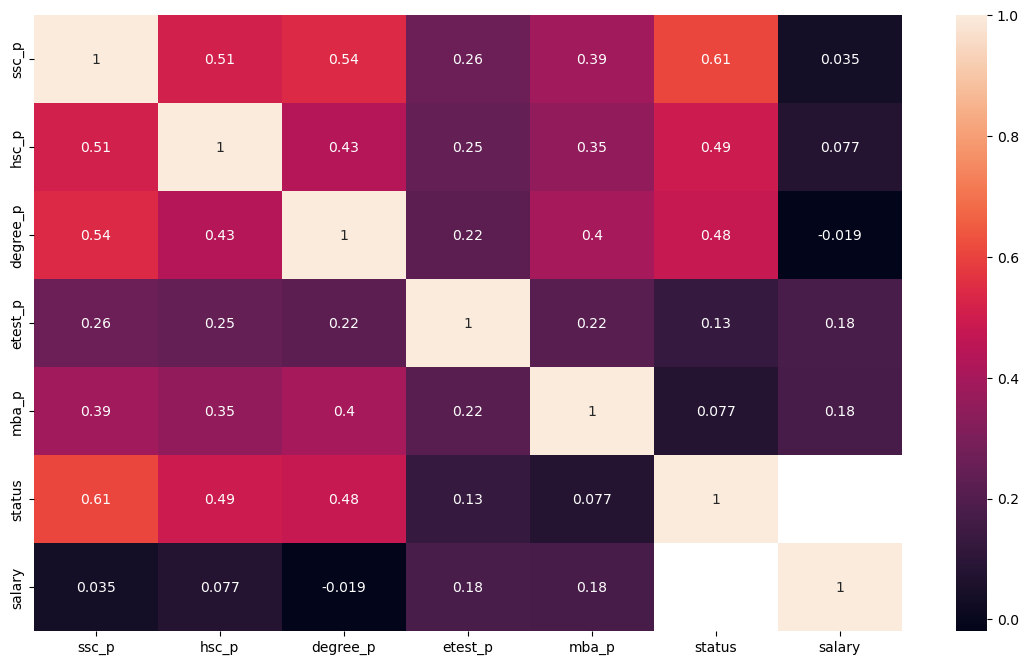

In [15]:
df_corr = df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'salary']]
df_corr['status'] = df_corr['status'].map({'Placed': 1, 'Not Placed': 0})

corrmat_p = df_corr.corr()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corrmat_p, annot=True)
plt.show()

In [16]:
# Grupowanie danych na podstawie statusu ( Placed lub Not Placed), wybieramy kolumnę salary a następnie sumujemy wszystkie wartości które są Puste (NaN)
#df.groupby('status')['salary'].apply(lambda x: x.isnull().sum()).reset_index(name='liczba_brakow')
missing_salary_by_status = df.groupby('status').agg(liczba_brakow=('salary', lambda x: x.isnull().sum())).reset_index()

### Przykład współlinowości gdzie cecha salary jest zależna od statusu przyjęcia.
Przekazanie tych cech razem wpłynęłoby negatywnie na przewidywania modelu, sztucznie zawyżałoby wyniki.

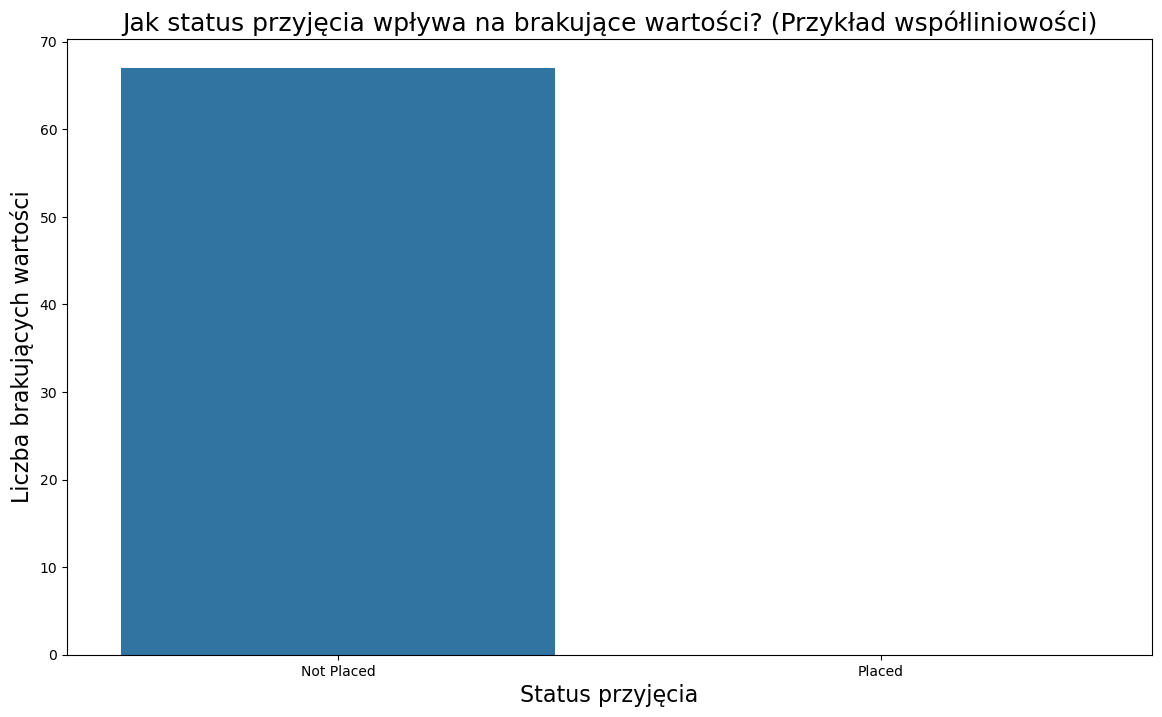

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(missing_salary_by_status, x='status', y='liczba_brakow', ax=ax)
ax.set_title('Jak status przyjęcia wpływa na brakujące wartości? (Przykład współliniowości)', fontsize=18)
ax.set_xlabel('Status przyjęcia', fontsize=16)
ax.set_ylabel('Liczba brakujących wartości', fontsize=16)
plt.show()

In [18]:
df[df['degree_p'] <= 56].sort_values(by='degree_p', ascending=False).head(n=10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
148,F,77.00,Central,86.0,Central,Arts,56.00,Others,No,57.00,Mkt&Fin,64.08,Placed,240000.0
193,F,60.00,Central,63.0,Central,Arts,56.00,Others,Yes,80.00,Mkt&HR,56.63,Placed,300000.0
176,F,59.00,Central,60.0,Others,Commerce,56.00,Comm&Mgmt,No,55.00,Mkt&HR,57.90,Placed,220000.0
172,M,73.00,Others,58.0,Others,Commerce,56.00,Comm&Mgmt,No,84.00,Mkt&HR,52.64,Placed,300000.0
173,F,52.00,Others,52.0,Others,Science,55.00,Sci&Tech,No,67.00,Mkt&HR,59.32,Not Placed,NaN
149,M,44.00,Central,58.0,Central,Arts,55.00,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,Not Placed,NaN
188,M,61.80,Others,47.0,Others,Commerce,54.38,Comm&Mgmt,No,57.00,Mkt&Fin,56.13,Not Placed,NaN
106,M,61.08,Others,50.0,Others,Science,54.00,Sci&Tech,No,71.00,Mkt&Fin,65.69,Not Placed,NaN
93,M,52.00,Central,62.0,Central,Commerce,54.00,Comm&Mgmt,No,72.00,Mkt&HR,55.41,Not Placed,NaN
214,M,62.00,Central,58.0,Others,Science,53.00,Comm&Mgmt,No,89.00,Mkt&HR,60.22,Not Placed,NaN


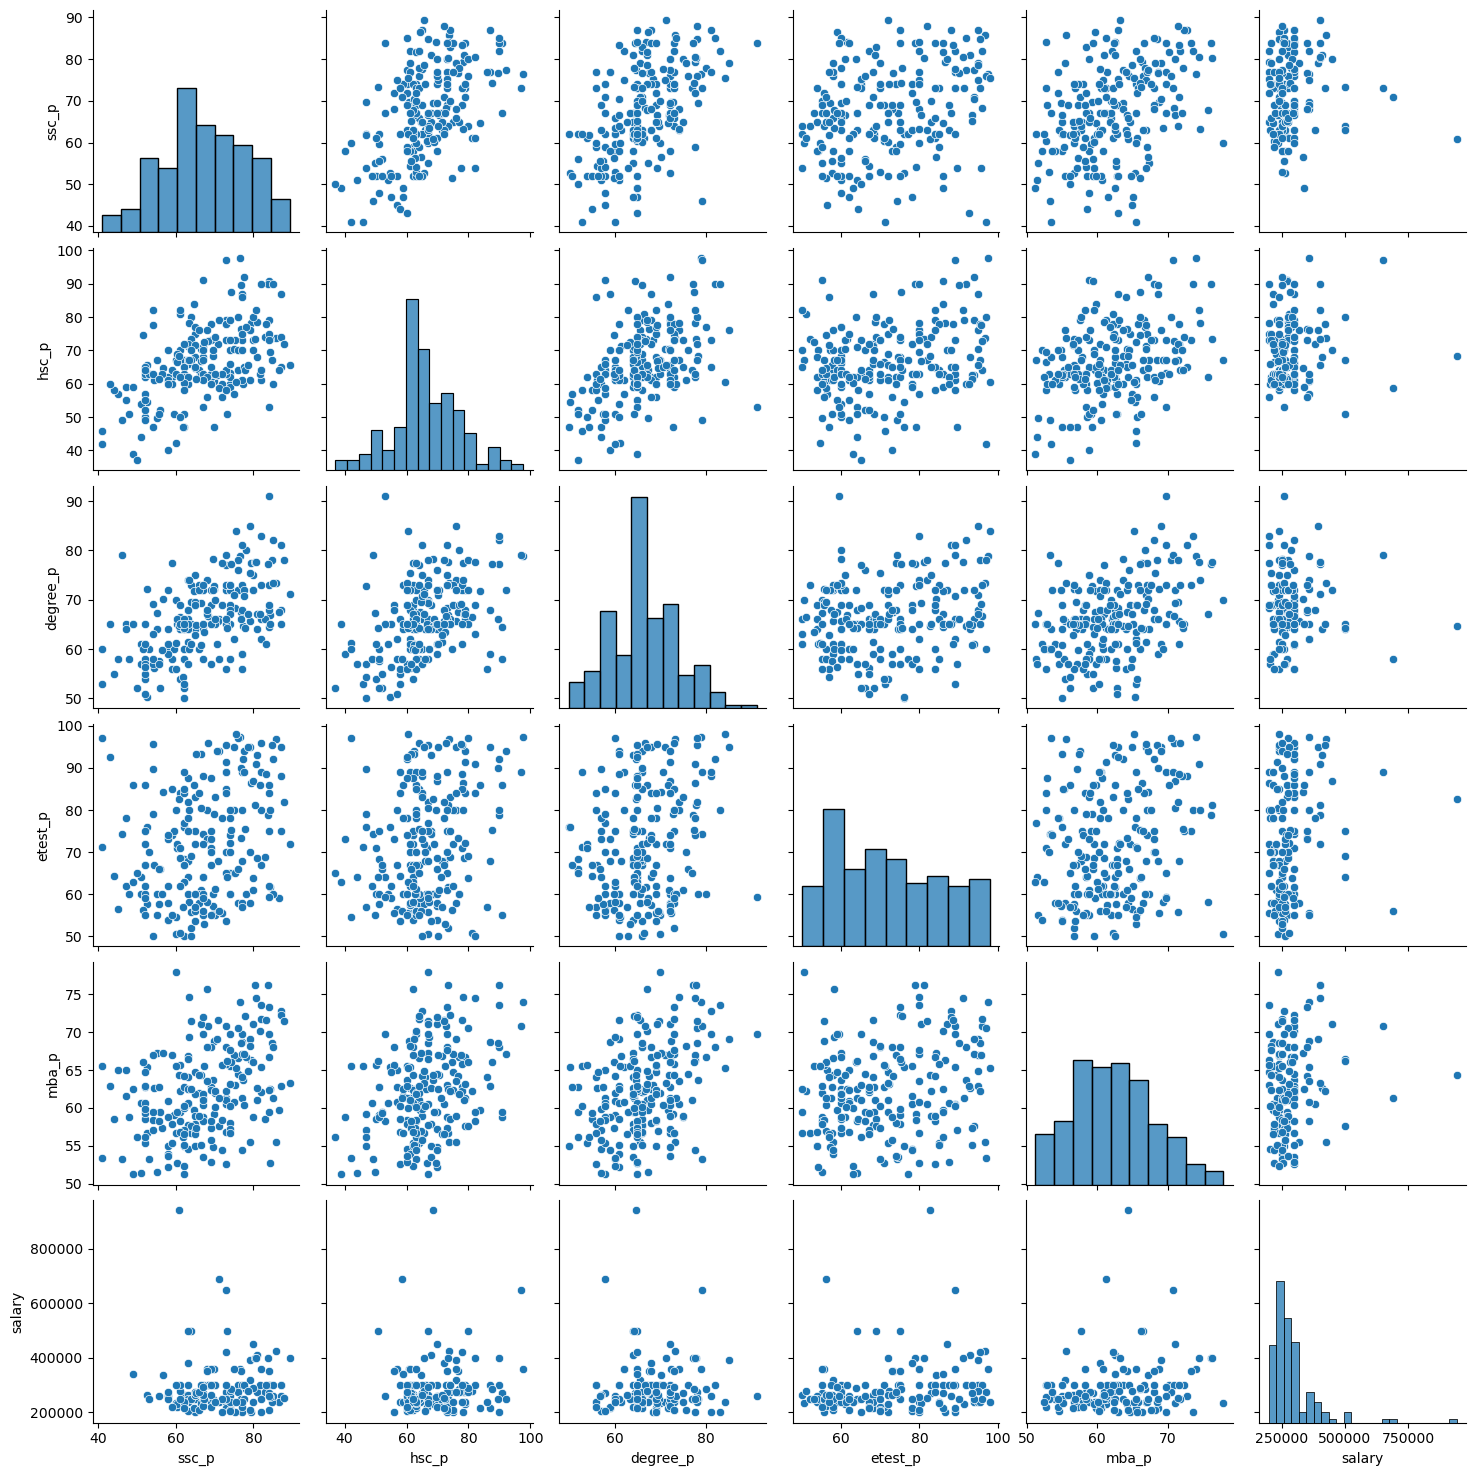

In [19]:
sns.pairplot(df)
plt.show()

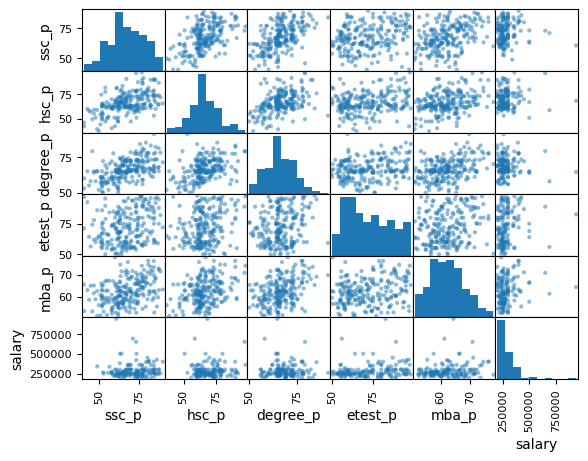

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

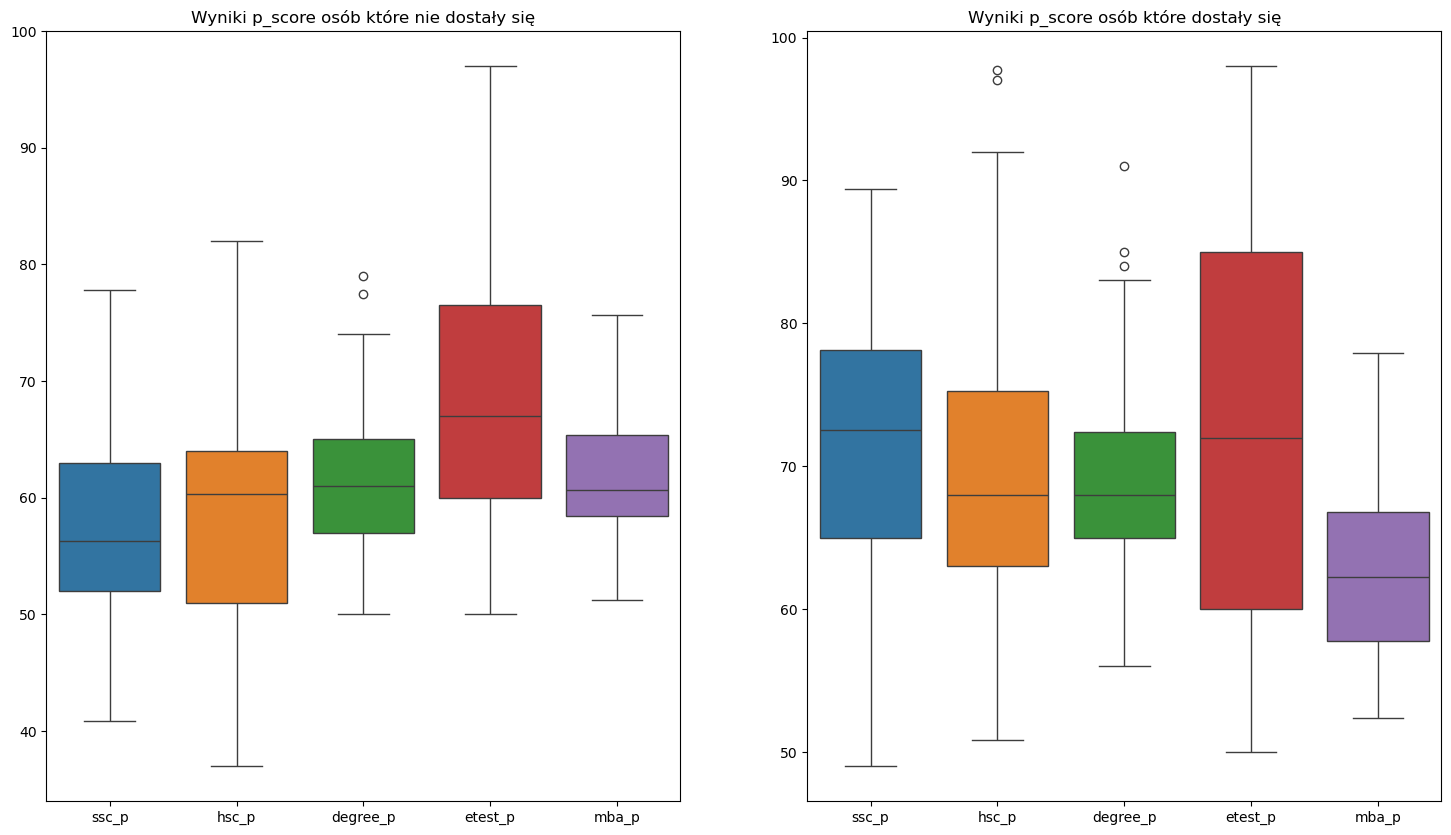

In [21]:
no_salary_df = df.drop('salary', axis=1)

placed_df = no_salary_df[df.status == 'Placed']
nplaced_df = no_salary_df[df.status == 'Not Placed']

#p_df = placed_df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
sns.boxplot(nplaced_df, ax=ax[0])
ax[0].set_title('Wyniki p_score osób które nie dostały się')

sns.boxplot(placed_df, ax=ax[1])
ax[1].set_title('Wyniki p_score osób które dostały się')

plt.show()

In [22]:
from scipy.stats import ttest_ind

In [23]:
columns_to_test = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
p_values = {}

for col in columns_to_test:
    t_stat, p_val = ttest_ind(placed_df[col], nplaced_df[col], nan_policy='omit')
    p_values[col] = p_val

p_values

{'ssc_p': np.float64(4.115201043884403e-23),
 'hsc_p': np.float64(1.849212756931434e-14),
 'degree_p': np.float64(8.807682138862608e-14),
 'etest_p': np.float64(0.061720381110174166),
 'mba_p': np.float64(0.26144500197748627)}

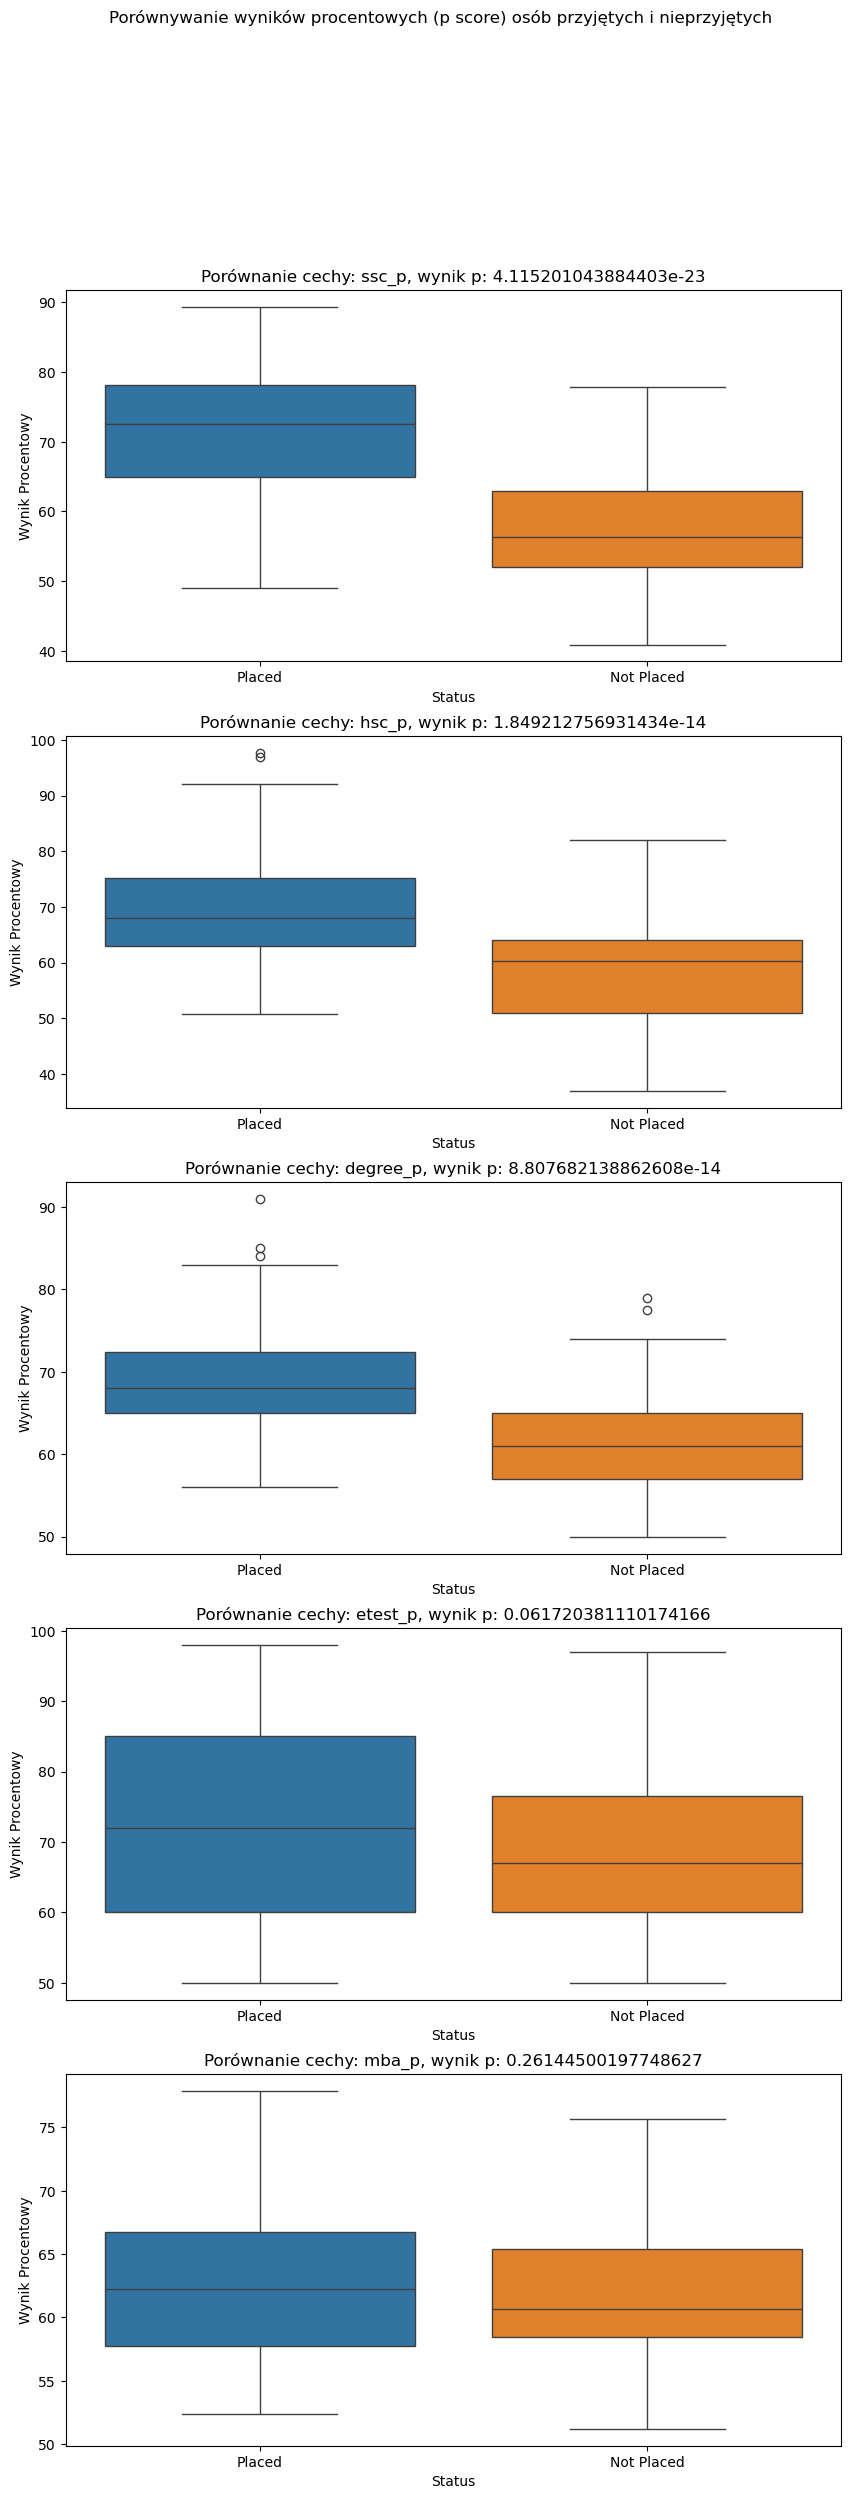

In [24]:
fig, ax = plt.subplots(nrows=len(columns_to_test), ncols=1, figsize=(10, 28))
fig.suptitle('Porównywanie wyników procentowych (p score) osób przyjętych i nieprzyjętych')

for i, col in enumerate(columns_to_test):
    sns.boxplot(df, x='status', y=col ,ax=ax[i], hue='status')
    ax[i].set_title(f'Porównanie cechy: {col}, wynik p: {p_values[col]}')
    ax[i].set_xlabel('Status')
    ax[i].set_ylabel('Wynik Procentowy')

### Porównanie boxplotów dwóch grup oraz test statystyczny wykazuje że osoby które się dostały posiadają wyższy procentowy wynik:
1. ssc_p
2. hsc_p
3. degree_p

### W przypadku dwóch ostatnich cech (etest_p oraz mba_p) nie występują znaczące różnice

## Odpowiedź do pytania 1:
Cechy (ssc_p, hsc_p oraz degree_p) mają statystycznie znaczący wpływ na przyjęcie osoby.

## Odpowiedź do pytania 2:
Tak, procentowe wyniki w powyższych cechach z wyjątkiem (etest_p oraz mba_p) mają wpływ na pozytywną decyzję o przyjęciu osoby.

In [25]:
# Filtrowanie danych na podstawie statusu przyjęcia
# Grupowanie na podstawie specjalizacji a następnie degree_t
# Agregacja danych: 1. Policzenie ilości osób dla poszczególnego degree_t oraz średnie zarobki dla tej grupy osób
specialisation_df = df[df.status == 'Placed'].groupby(['specialisation', 'degree_t']).agg(ilosc_osob=('salary', 'count'), srednie_zarobki=('salary', 'mean'))
specialisation_df

ilosc_osob  srednie_zarobki
specialisation degree_t                              
Mkt&Fin        Comm&Mgmt          68    290044.117647
               Others              2    300000.000000
               Sci&Tech           25    322720.000000
Mkt&HR         Comm&Mgmt          34    255794.117647
               Others              3    267333.333333
               Sci&Tech           16    301937.500000

In [26]:
spec_reset_df = specialisation_df.reset_index()

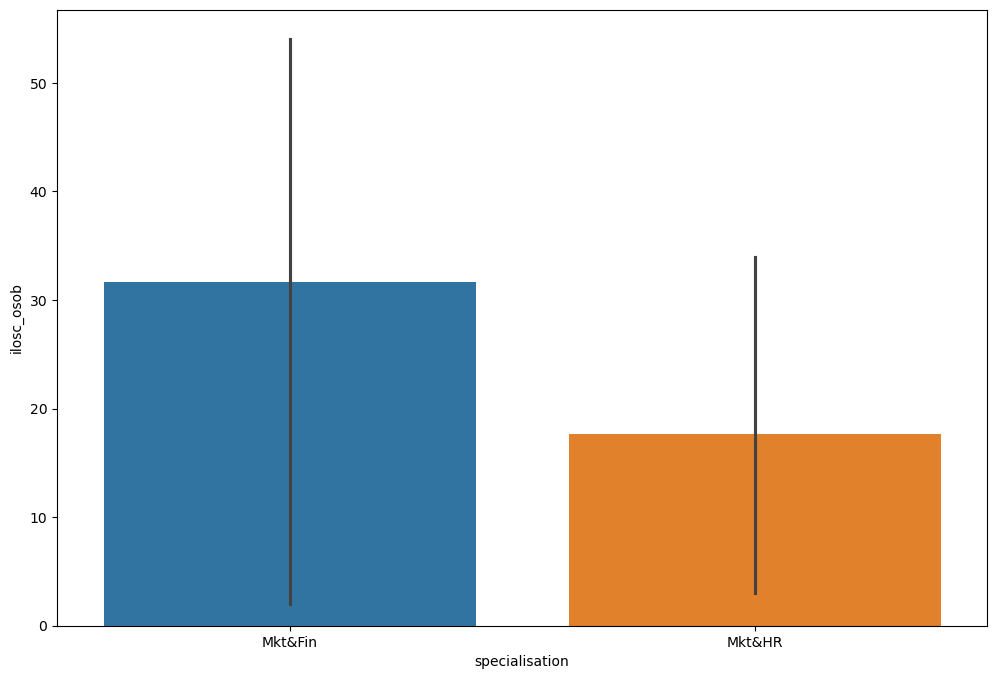

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(spec_reset_df, x='specialisation', y='ilosc_osob', hue='specialisation')
plt.show()

## Odpowiedź do pytania 3:
Najbardziej porządaną specjalizacją przez firmy jest Marketing i Finanse , najwięcej osób w tej grupie jest zatrudnionych na stanowisku Handel i Zarządzanie. 
Średnie zarobki w tej grupie wynoszą 290044